# Notebook for shallow water bathymetry with laser satellite

First we load in the data we need, and plot it to inspect the values

In [ ]:
# Import the nessesary python libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load in the .txt file. We tell python its a comma separated file
data = np.loadtxt("icesat.txt", delimiter=",")

# Extract the values from the columns
lat = data[:,0]
lon = data[:,1]
depth = data[:,2]
beam_id = data[:,3]

In [ ]:
# Plot each beam id number to see the spatial location
colors = ["r", "g", "b", "orange", "olive", "cyan"]
for i in range(1, 7):
    mask = beam_id == i
    plt.scatter(lon[mask], lat[mask], 1, label="Beam "+str(i), color=colors[i-1])
plt.legend()
plt.show()

In [ ]:
# Inspect the beams furthest to the west
colors = ["r", "g", "b", "orange", "olive", "cyan"]
mask = beam_id == 1
plt.scatter(lat[mask], depth[mask], 0.1, label="Beam 1", color=colors[0])
mask = beam_id == 4
plt.scatter(lat[mask], depth[mask], 0.1, label="Beam 4", color=colors[3])
plt.legend()

## Determine the bathymetry
We will determine the bathymetry from beam 1. We will therefore extract the values below -0.5 meters.

In [ ]:
# Get data from beam 1
beam_n = 1
# Make datamask where we select data from beam 1 AND depth below -0.5 m
mask = (beam_id == beam_n) & (depth<-0.5)
# Extract depth
lat = lat[mask]
depth = depth[mask]

In [ ]:
# Plot the data
plt.scatter(lat, depth, 0.01, color="r")

## Correct for refraction
We need to adjust the bathymetry for refraction. A simple correction for refraction is given as Z’ =
Z-0.25416*Z, where Z’ is the corrected elevation, and Z is the uncorrected elevation

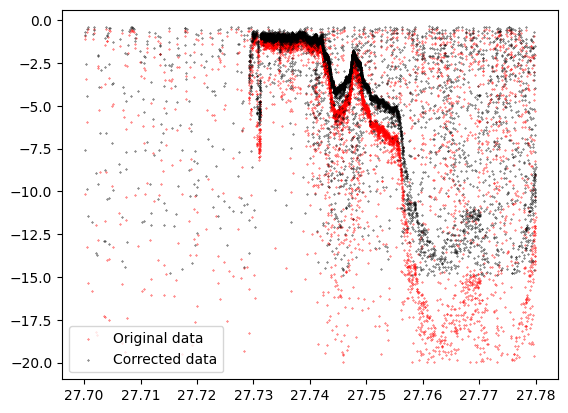

In [207]:
# Correct for refraction
bath = depth - 0.25416*depth
plt.scatter(lat, depth, 0.1, "r", label="Original data")
plt.scatter(lat, bath, 0.1, "k", label="Corrected data")
plt.legend()

# Further data processing

In [ ]:
# Compute the running mean to determine the bathymetry
mean_width = 200
running_mean = []
for i in range(lat.size):
    running_mean.append(np.mean(bath[i:i+mean_width]))

plt.scatter(lat, bath, 0.1, "k")
plt.plot(lat, running_mean, "r")
plt.show()

In [ ]:
# Compute the running median to determine the bathymetry
median_width = 200
running_median = []
for i in range(lat.size):
    running_median.append(np.median(bath[i:i+median_width]))

plt.scatter(lat, bath, 0.1, "k")
plt.plot(lat, running_median, "r")
plt.show()

## Further work (optional)
If you are done, and want to try further processing yourself, feel free to compute the bathymetry for the other beams of the satellite. Try to compare the bathymetry with the optical image shown in the presentation. Does it make sense?